# Plot individual and voting regression predictions

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. We will use three different regressors to predict the data: GradientBoostingRegressor, RandomForestRegressor, and LinearRegression). Then the above 3 regressors will be used for the VotingRegressor.

Finally, we will plot the predictions made by all models for comparison.




# 1. Import necessary libraries

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import LinearRegression

# 2. Load the dataset

In [34]:
X, y = load_diabetes(return_X_y=True)

In [36]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [38]:
pd.DataFrame(X).shape

(442, 10)

In [40]:
pd.DataFrame(y).head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


# 3. Training the regressor

In [41]:
# Instantiate the object

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

In [42]:
# fit the models

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

LinearRegression()

In [43]:
ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])

In [44]:
ereg.fit(X , y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

# 4. Making predictions

Now we will use each of the regressors to make the 15 first predictions.

In [45]:
xt = X[:15]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

# 5. Plot and visualize the results

Finally, we will visualize the 15 predictions. The red stars show the average prediction made by VotingRegressor

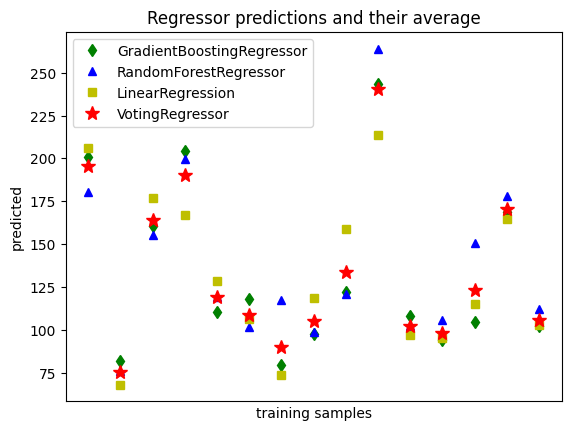

In [46]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()